---

Universidade Federal do Rio Grande do Norte

Centro de Tecnologia

Departamento de Engenharia de Computação e Automação

ELE0606 - Tópicos especiais em inteligência artificial

Student: Levy Gabriel da Silva Galvão

Título: Decision tree

---

# Libraries import

In [ ]:
# Data manipulation
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import time

import pydotplus 
from IPython.display import Image

# Scipy
import scipy.stats as stats

# Model persistence
from joblib import dump, load

# Machine Learning
from sklearn.tree import DecisionTreeClassifier, \
                          export_graphviz
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, \
                            confusion_matrix, \
                            plot_confusion_matrix

# Dataset

The objective of this analysis is to apply decision tree classifier on to three different datasets using the Sklearn library. Furthermore comparing the results with the KNN (https://github.com/Lwao/awesome-ai/blob/main/ufrn-ai/scikit-example-kit/knn_wine.ipynb) and Naive Bayes (https://github.com/Lwao/awesome-ai/blob/main/ufrn-ai/scikit-example-kit/bayes.ipynb) obtained in previous works.

Three datasets will be used, 

The first one is the wine dataset (https://archive.ics.uci.edu/ml/datasets/wine) that contains the information about 13 feature attributes that links to three different classes of wine.

The second one is the car evaluation dataset (https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) with categorical features such as: buying, maint, doors, persons, lug boot and safety and 4 differents classes: unaccetable, accetable, good and very good.

The third one is the Synthetic Control Chart Time Series (https://archive.ics.uci.edu/ml/datasets/synthetic+control+chart+time+series). This dataset contains 600 examples of control charts synthetically generated by the process in Alcock and Manolopoulos (1999). There are six different classes of control charts:

1. Normal
2. Cyclic
3. Increasing trend
4. Decreasing trend
5. Upward shift
6. Downward shift 

This last one represents a clustering problem.

Right below all datasets are loaded into different variables to start the analysis. It is important to see that when using the pandas method `info()` some features about the quality of the dataset are shown. Based on this information, there is no need in cleaning the dataset, once it is already fit for training.

For the wine dataset:

In [ ]:
filename = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
df_wine = pd.read_csv(filename, header=None)
df_wine.columns = ['target', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 
              'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 
              'color_intensity', 'hue', 'OD280/OD315_of_diluted_wines', 'proline']

df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   target                        178 non-null    int64  
 1   alcohol                       178 non-null    float64
 2   malic_acid                    178 non-null    float64
 3   ash                           178 non-null    float64
 4   alcalinity_of_ash             178 non-null    float64
 5   magnesium                     178 non-null    int64  
 6   total_phenols                 178 non-null    float64
 7   flavanoids                    178 non-null    float64
 8   nonflavanoid_phenols          178 non-null    float64
 9   proanthocyanins               178 non-null    float64
 10  color_intensity               178 non-null    float64
 11  hue                           178 non-null    float64
 12  OD280/OD315_of_diluted_wines  178 non-null    float64
 13  proli

For the car evaluation dataset:

In [ ]:
filename = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
df_car = pd.read_csv(filename, header=None)
df_car.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'target']

df_car.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   target    1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


For the synthetic control chart time series:

In [ ]:
filename = 'https://archive.ics.uci.edu/ml/machine-learning-databases/synthetic_control-mld/synthetic_control.data'
df_ctrl = pd.read_csv(filename, header=None, delim_whitespace=True)

# Wine dataset

Below the Sklearn decision tree algorithm is run into the Wine dataset.

The dataset was split in a 80%/20% fashion for train and test set. The train set was used to train a decision tree using the entropy criterion and no max depth defined, so the tree can progress in as many nodes as needed.

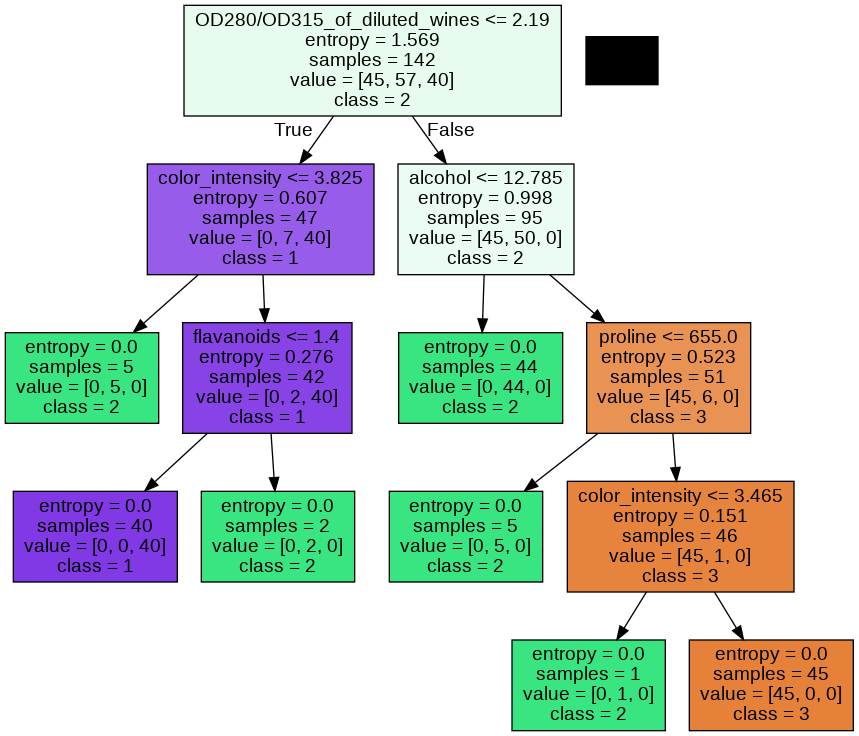

In [ ]:
train, test = train_test_split(df_wine, train_size=0.8, random_state=42, shuffle=True)

features = train.drop(columns=['target'])
targets = train['target']

clf = DecisionTreeClassifier(criterion='entropy', max_depth=None)
clf = clf.fit(features, targets)

dot_data = export_graphviz(clf, feature_names=features.columns, class_names=targets.apply(lambda x: str(x)).unique(), filled=True, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

The training results shown in the tree graph shows that 5 depths was used to achieve satisfying results. When running below the score for the test set, it is achieve a score of approximately 92%.

When comparing this result in the Wine dataset using decision tree model and the previous models: naive Bayes and KNN; it is clearly to see that with the naive Bayes score of 98.3% and the KNN score of  98%, the decision tree does not looks a perfect choice for this set of data.

In [ ]:
features = test.drop(columns=['target'])
targets = test['target']

pred = clf.predict(features)
print(classification_report(targets, pred))

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       0.88      1.00      0.93        14
           3       1.00      0.62      0.77         8

    accuracy                           0.92        36
   macro avg       0.94      0.88      0.89        36
weighted avg       0.93      0.92      0.91        36



Looking the confusiion matrix, labels 1 and 2 occurs more frequently and with no error in prediction. But label 3 is the one that have most and all erros of the model.

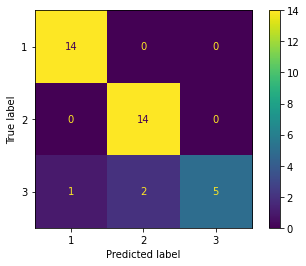

In [ ]:
cm = confusion_matrix(targets, pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

# Car evaluation dataset

When checking the head the car evaluation dataset, it is noticed that most of it's attributes are categorical, and they assumed the following labels:

- buying: vhigh, high, med, low.
- maint: vhigh, high, med, low.
- doors: 2, 3, 4, 5more.
- persons: 2, 4, more.
- lug_boot: small, med, big.
- safety: low, med, high. 

In [ ]:
df_car.head()

,buying,maint,doors,persons,lug_boot,safety,target
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


So it emerges a need to preprocess this data so the Sklearn decision can work with ease. 

Despite the documentation saying that the Sklearn can work with categorical data, it retifies that in th ecurrent version it is not capable of analysing it directly. 

The preprocessing tool used is the Sklearn `OrdinalEncoder` that encoded the categorical features in an integer array, e.g. if considering car colors such as white, black, silver and gray, those features are encoded into numbers such as 1, 2, 3 and/or 4. This allows the decision tree apply it's decision statements with ease.

Below the train/test split it is made with a 80%/20% proportion. The classifier still used the entropy criterion for best results and a max depth was defined, at sake of simplicity in the tree visualization.

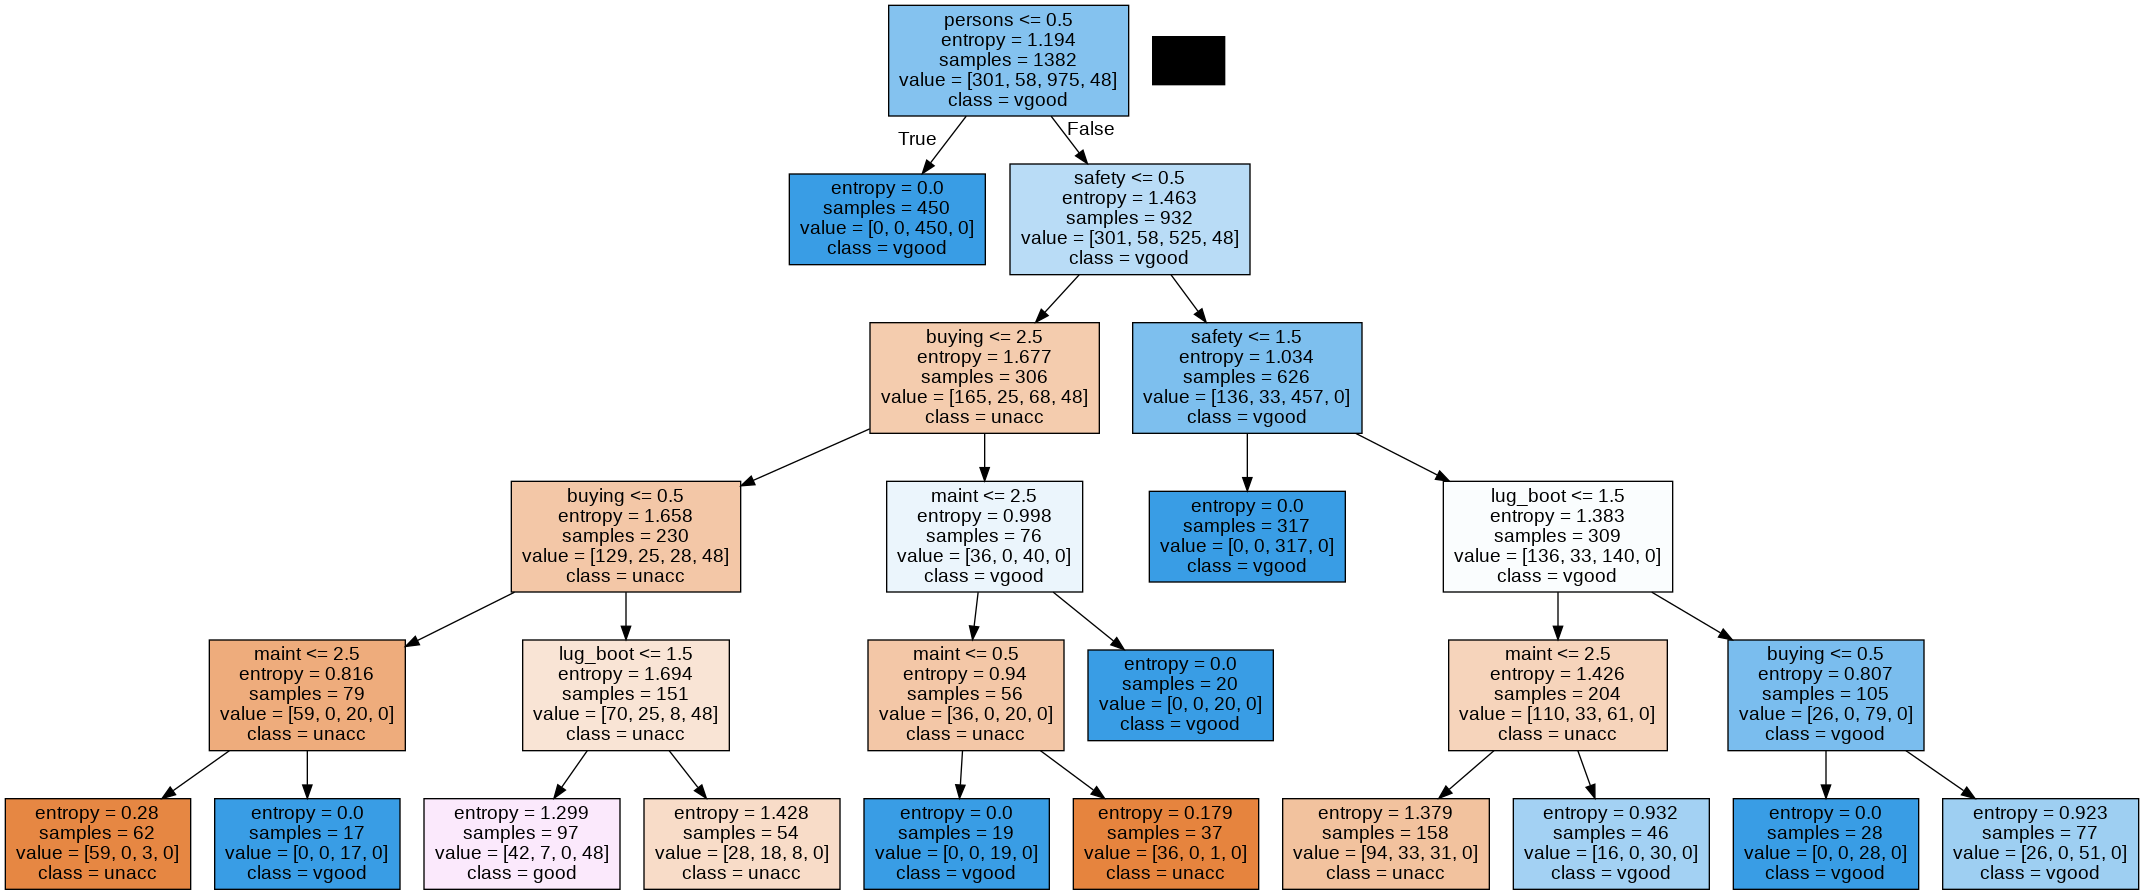

In [ ]:
train, test = train_test_split(df_car, train_size=0.8, random_state=42, shuffle=True)

features = train.drop(columns=['target'])
targets = train['target']

ord_enc = OrdinalEncoder()
encoded_features = pd.DataFrame(ord_enc.fit_transform(features))
encoded_features.columns = features.columns

clf = DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf = clf.fit(encoded_features, targets)

dot_data = export_graphviz(clf, feature_names=features.columns, class_names=targets.apply(lambda x: str(x)).unique(), filled=True, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

Below the score is run with the test set and it varies according to the max depth of choice.

For better visualization, the max depth was set in 5, and this results in the score below of 89%.

But when increasing the max depth in previous tests, the following scores were obtained:

- Max depth of 5, score of 86.7%;
- Max depth of 10, score of 95.3%;
- Max depth of 15, score of 96.8%;
- Max depth of 20, score of 96.8%;

The score stagnated between a max depth of 10 and 15 with not further increase.

In [ ]:
features = test.drop(columns=['target'])
targets = test['target']

encoded_features = pd.DataFrame(ord_enc.fit_transform(features))
encoded_features.columns = features.columns

pred = clf.predict(encoded_features)
print(classification_report(targets, pred, labels=np.unique(pred)))
print('Score = ' + str(clf.score(encoded_features, targets)))

              precision    recall  f1-score   support

         acc       0.80      0.63      0.70        83
       unacc       0.92      0.98      0.95       235
       vgood       0.55      1.00      0.71        17

   micro avg       0.87      0.90      0.88       335
   macro avg       0.76      0.87      0.79       335
weighted avg       0.87      0.90      0.88       335

Score = 0.8670520231213873


The confusion matrix below shows a biased panoram, since the label 'unacc' has more occurrences. But the 'unacc' and 'vgood' labels are predicted with most accuracy. The 'acc' labels comes in third place with a good amount of labels correctly predicted, but with most mislead. The 'good' label displays the worst behaviour, since there is no true positives, but also is the label with less examples and this might have been a factor to a bad prediction of the specific label.

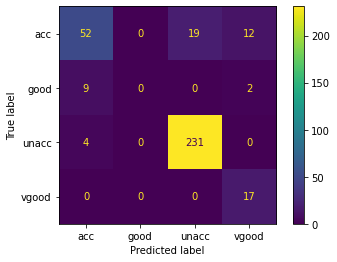

In [ ]:
cm = confusion_matrix(targets, pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()